In [1]:
from src import *

In [2]:
file_name = 'transfered_siamese_model_Isaac'
# file_name = 'naive_siamese_model_Isaac'

siamese_model = make_siamese_model(make_embedding())
siamese_model.load_weights(os.path.join(SAVED_MODEL_PATH, f"{file_name}.h5"))

In [3]:
# results = verify(siamese_model,ver_path=r'C:\Users\xafra\Documents\2A\Cassiopée\b\RFTL2\data\verification_demo')
results = verify(siamese_model,ver_path=ANC_PATH)
mean, median, min, max = np.mean(results), np.median(results), np.min(results), np.max(results)
print(f"Mean score :\t{mean}\nMedian score :\t{median}\nMinimum score :\t{min}\nMaximum score :\t{max}")
first_quartile, third_quartile = np.quantile(results, 0.25), np.quantile(results, 0.75)
print(f"First quartile :\t{first_quartile}\nThird quartile :\t{third_quartile}")

Verifying 25 data.
Mean score :	0.5449179410934448
Median score :	0.5459511280059814
Minimum score :	0.2901232838630676
Maximum score :	0.7865982055664062
First quartile :	0.494006983935833
Third quartile :	0.6170020699501038


$$q^{(3)}_{positive} \lesssim 0.50$$
$$q^{(3)}_{negative} \gtrsim 0.55$$
$$q^{(3)}_{threshold} \simeq 0.55$$

In [4]:
k,m =0,0

1 86


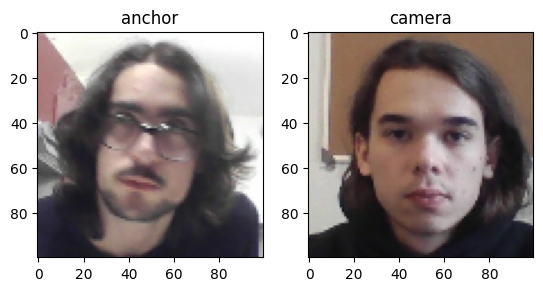

[[0.2582968]]


In [5]:
# k = np.random.randint(0, len(os.listdir(ANC_PATH)))
# m = np.random.randint(0, len(os.listdir(VER_PATH)))
anc_path = ANC_PATH
ver_path = r'C:\Users\xafra\Documents\2A\Cassiopée\b\RFTL2\data\verification_demo'
k+=1
m-=1
k %= len(os.listdir(anc_path)); m %= len(os.listdir(ver_path))
print(k,m)
anchor_file_path = os.path.join(anc_path, os.listdir(anc_path)[k])
verify_file_path = os.path.join(ver_path, os.listdir(ver_path)[m])

test_input = np.array(preprocess(anchor_file_path))
test_val = np.array(preprocess(verify_file_path))
plot_images_b2b(test_input, test_val, title1='anchor', title2='camera')

result = siamese_model.predict([np.array([test_input]), np.array([test_val])])
print(result)

In [6]:
LIVE_PATH = os.path.join('data', 'live')

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        cv2.imwrite(os.path.join(LIVE_PATH, 'input_image.jpg'), frame)
        # Run verification
        print(verify(siamese_model, ver_path=LIVE_PATH))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

TypeError: verify() missing 1 required positional argument: 'model'

: 